# !pip

In [ ]:
!pip install --upgrade lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORT文

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import early_stopping
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter('ignore')

In [ ]:
lgb.__version__

'3.3.2'

In [ ]:
df_train = pd.DataFrame()
for i in range(0, 47):
    if i<9:
        i = "0" + str(i+1)
        df_ = pd.read_csv(f"/content/drive/MyDrive/Competitions/Nishika/mansion/input/train/{str(i)}.csv")
        df_train = pd.concat([df_train, df_])
    else:
        df_ = pd.read_csv(f"/content/drive/MyDrive/Competitions/Nishika/mansion/input/train/{str(i+1)}.csv")
        df_train = pd.concat([df_train, df_])
df_train = df_train.reset_index(drop=True)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Competitions/Nishika/mansion/input/test.csv")
df_sub = pd.read_csv("/content/drive/MyDrive/Competitions/Nishika/mansion/input/sample_submission.csv")

In [ ]:
df_train

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1000809,中古マンション等,NaN,1101,北海道,札幌市中央区,北１条西,西１８丁目,5,オープンフロア,...,NaN,NaN,NaN,商業地域,80.0,400.0,2019年第3四半期,改装済,NaN,6.963788
1,1108719,中古マンション等,NaN,1206,北海道,釧路市,浪花町,釧路,10,３ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2013年第1四半期,未改装,NaN,7.000000
2,1028203,中古マンション等,NaN,1103,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,NaN,7.301030
3,1040438,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒中央通,福住,4,３ＬＤＫ,...,NaN,NaN,NaN,準工業地域,60.0,300.0,2009年第2四半期,未改装,NaN,7.255273
4,1100395,中古マンション等,NaN,1204,北海道,旭川市,宮下通,旭川,3,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,600.0,2017年第1四半期,未改装,NaN,6.361728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722569,47014330,中古マンション等,NaN,47201,沖縄県,那覇市,牧志,牧志,1,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2010年第4四半期,未改装,NaN,7.462398
722570,47027878,中古マンション等,NaN,47201,沖縄県,那覇市,泊,美栄橋,9,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2013年第3四半期,未改装,NaN,6.477121
722571,47003801,中古マンション等,NaN,47208,沖縄県,浦添市,牧港,NaN,NaN,３ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2021年第2四半期,未改装,NaN,7.278754
722572,47003954,中古マンション等,NaN,47208,沖縄県,浦添市,屋富祖,古島,30分?60分,４ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2019年第4四半期,未改装,NaN,7.301030


In [ ]:
df_test

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1000078,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１１丁目,1,３ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2021年第3四半期,未改装,NaN
1,1000121,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,0,１ＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第3四半期,改装済,NaN
2,1000123,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,3,３ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第3四半期,改装済,NaN
3,1000127,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,2,２ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第4四半期,未改装,NaN
4,1000129,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,2,１ＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第4四半期,改装済,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,47003951,中古マンション等,NaN,47208,沖縄県,浦添市,屋富祖,古島,30分?60分,２ＬＤＫ,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2021年第3四半期,NaN,調停・競売等
21001,47006115,中古マンション等,NaN,47211,沖縄県,沖縄市,高原,NaN,NaN,３ＬＤＫ,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2021年第3四半期,未改装,NaN
21002,47006712,中古マンション等,NaN,47211,沖縄県,沖縄市,与儀,NaN,NaN,３ＬＤＫ,...,住宅,NaN,NaN,NaN,市街化区域及び市街化調整区域外の都市計画区域,70.0,200.0,2021年第3四半期,未改装,NaN
21003,47023667,中古マンション等,NaN,47201,沖縄県,那覇市,おもろまち,おもろまち,12,２ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第3四半期,未改装,NaN


In [ ]:
df_sub

,ID,取引価格（総額）_log
0,1000078,0
1,1000121,0
2,1000123,0
3,1000127,0
4,1000129,0
...,...,...
21000,47003951,0
21001,47006115,0
21002,47006712,0
21003,47023667,0


In [ ]:
df_train.isna().sum()

ID                   0
種類                   0
地域              722574
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                668
最寄駅：名称            2731
最寄駅：距離（分）        23157
間取り              25892
面積（㎡）                0
土地の形状           722574
間口              722574
延床面積（㎡）         722574
建築年              20981
建物の構造            19152
用途               70861
今後の利用目的         365920
前面道路：方位         722574
前面道路：種類         722574
前面道路：幅員（ｍ）      722574
都市計画             19818
建ぺい率（％）          24161
容積率（％）           24161
取引時点                 0
改装               68076
取引の事情等          703632
取引価格（総額）_log         0
dtype: int64

In [ ]:
df_test.isna().sum()

ID                0
種類                0
地域            21005
市区町村コード           0
都道府県名             0
市区町村名             0
地区名               1
最寄駅：名称            5
最寄駅：距離（分）         5
間取り            1158
面積（㎡）             0
土地の形状         21005
間口            21005
延床面積（㎡）       21005
建築年             601
建物の構造          1229
用途             5609
今後の利用目的         924
前面道路：方位       21005
前面道路：種類       21005
前面道路：幅員（ｍ）    21005
都市計画            304
建ぺい率（％）         409
容積率（％）          409
取引時点              0
改装             2973
取引の事情等        20827
dtype: int64

In [ ]:
df_train.columns

Index(['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '取引価格（総額）_log'],
      dtype='object')

In [ ]:
df_train['種類'].value_counts()

中古マンション等    722574
Name: 種類, dtype: int64

In [ ]:
df_test['種類'].value_counts()

中古マンション等    21005
Name: 種類, dtype: int64

In [ ]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [ ]:
LABEL_LIST = df.select_dtypes(include=object).columns

In [ ]:
df[LABEL_LIST] = df[LABEL_LIST].fillna("nan")

## 1. 特徴量生成

## 2. 不要なカラムの削除

In [ ]:
def drop_columns(df, columns):
    df = df.drop(labels=columns, axis=1)
    return df

In [ ]:
DROP_LIST = ["ID", "種類", "地域", "面積（㎡）", "土地の形状", "間口", "延床面積（㎡）", "前面道路：方位", "前面道路：種類", "前面道路：幅員（ｍ）", "取引の事情等"]
df = drop_columns(df, DROP_LIST)

## 3. ラベルエンコーディング

In [ ]:
df.isna().sum()

市区町村コード             0
都道府県名               0
市区町村名               0
地区名                 0
最寄駅：名称              0
最寄駅：距離（分）           0
間取り                 0
建築年                 0
建物の構造               0
用途                  0
今後の利用目的             0
都市計画                0
建ぺい率（％）         24570
容積率（％）          24570
取引時点                0
改装                  0
取引価格（総額）_log    21005
dtype: int64

In [ ]:
def label_encoding(df, column_list):
    for column in column_list:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    return df

In [ ]:
LABEL_LIST = df.select_dtypes(include=object).columns

In [ ]:
df = label_encoding(df, LABEL_LIST)

In [ ]:
df.dtypes

市区町村コード           int64
都道府県名             int64
市区町村名             int64
地区名               int64
最寄駅：名称            int64
最寄駅：距離（分）         int64
間取り               int64
建築年               int64
建物の構造             int64
用途                int64
今後の利用目的           int64
都市計画              int64
建ぺい率（％）         float64
容積率（％）          float64
取引時点              int64
改装                int64
取引価格（総額）_log    float64
dtype: object

## dfをtrainとtestに分ける

In [ ]:
df_train_preprocessed = df.copy().iloc[:len(df_train)]
df_test_preprocessed = df.copy().drop("取引価格（総額）_log", axis=1).iloc[len(df_train):].reset_index(drop=True)

In [ ]:
df_train_preprocessed.head()

,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,1101,4,345,2323,3366,29,1,63,9,0,2,1,80.0,400.0,56,1,6.963788
1,1206,4,577,8147,3555,2,39,31,5,7,0,11,60.0,200.0,30,2,7.000000
2,1103,4,350,2392,2298,29,39,30,5,7,3,11,60.0,200.0,57,1,7.301030
3,1105,4,354,6444,2904,28,39,9,9,7,0,7,60.0,300.0,15,2,7.255273
4,1204,4,336,4625,1995,26,7,78,9,7,3,1,80.0,600.0,46,2,6.361728


In [ ]:
df_test_preprocessed.head()

,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,1101,4,345,4267,3365,1,39,22,5,7,3,1,80.0,600.0,64,2
1,1101,4,345,4267,3366,0,4,66,9,7,3,1,80.0,400.0,64,1
2,1101,4,345,4267,3366,26,39,73,9,7,3,1,80.0,400.0,64,1
3,1101,4,345,4267,3366,14,27,78,9,7,3,1,80.0,400.0,65,2
4,1101,4,345,4267,3366,14,4,27,9,7,3,1,80.0,400.0,65,1


In [ ]:
df_train_preprocessed.dtypes

市区町村コード           int64
都道府県名             int64
市区町村名             int64
地区名               int64
最寄駅：名称            int64
最寄駅：距離（分）         int64
間取り               int64
建築年               int64
建物の構造             int64
用途                int64
今後の利用目的           int64
都市計画              int64
建ぺい率（％）         float64
容積率（％）          float64
取引時点              int64
改装                int64
取引価格（総額）_log    float64
dtype: object

# モデリング

In [ ]:
def metric(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
class LightGBM:
    def __init__(self, params=None):
        if params == None:
            self.params = {
                "objective": "regression", 
                "learning_rate": .1,
                "reg_lambda": .1,
                "reg_alpha": 0,
                "max_depth": 5, 
                "n_estimators": 10000, 
                "colsample_bytree": .5, 
                "min_child_samples": 10,
                "subsample_freq": 3,
                "subsample": .9,
                "importance_type": "gain", 
                "random_state": 1
            }
        else:
            self.params = params

    def fit(self, df):
        # dataset作成
        train_X = df.drop("取引価格（総額）_log", axis=1)
        train_y = df["取引価格（総額）_log"]

        self._feature_name = train_X.columns
        self.models = []
        scores = []

        kf = KFold(n_splits=4, shuffle=True, random_state=2022)
        for fold, (tr_idx, va_idx) in enumerate(kf.split(train_X)):
            tr_X, va_X = train_X.iloc[tr_idx], train_X.iloc[va_idx]
            tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
            self.model = lgb.LGBMModel(**self.params)
            self.model.fit(
                tr_X,
                tr_y,
                eval_set=[(va_X, va_y)],
                callbacks=[early_stopping(stopping_rounds=10, verbose=False), 
                            lgb.log_evaluation(period=0, show_stdv=False)]
            )
        
            self.pred_array = self.predict(va_X)
            self.y_pred = (self.predict(va_X) > 0.5)
            self.MAE = metric(va_y, self.y_pred)

            scores.append(self.MAE)
            self.models.append(self.model)

            print(f"fold{fold+1}-MAE: {self.MAE}")
        print(f"mean-MAE: {sum(scores) / len(scores)}")

    def predict(self, df):
        test = df.values
        pred = self.model.predict(test)
        return pred
    
    def visualize_importance(self, top_num=10):
        
        fig, ax = plt.subplots(1, 1, figsize=(max(8, 1.2*top_num), 20))
        
        self._df_feature_importance = pd.DataFrame()
        for idx, clf  in enumerate(self.models):
            _df = pd.DataFrame()
            _df["feature_importance"] = clf.feature_importances_
            _df["feature_name"] = self._feature_name
            _df["fold"] = idx + 1
            self._df_feature_importance = pd.concat([self._df_feature_importance, _df])

        order = self._df_feature_importance.groupby("feature_name")["feature_importance"].sum()\
                                .sort_values(ascending=False).index[:top_num]

        sns.boxenplot(
            x="feature_importance", 
            y="feature_name", 
            data=self._df_feature_importance, 
            order=order, ax=ax
        )
        ax.grid()
        
        plt.show()

In [ ]:
# 学習の実行
model = LightGBM()
model.fit(df_train_preprocessed)

fold1-MAE: 6.22832768751614
fold2-MAE: 6.2276974844526825
fold3-MAE: 6.227489062927962
fold4-MAE: 6.228358755098323
mean-MAE: 6.227968247498777


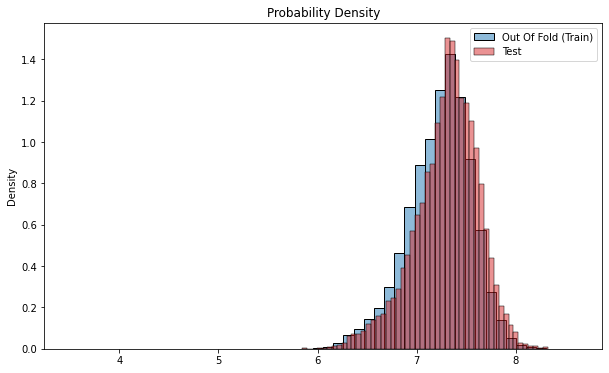

In [ ]:
pred_test = model.predict(df_test_preprocessed)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(x=model.pred_array, bins=50, alpha=0.5, ax=ax, stat="density", label="Out Of Fold (Train)", color="tab:blue")
sns.histplot(x=pred_test, bins=50, alpha=0.5, ax=ax, stat="density", label="Test", color="tab:red")

ax.set_title("Probability Density")
ax.legend()
plt.show()

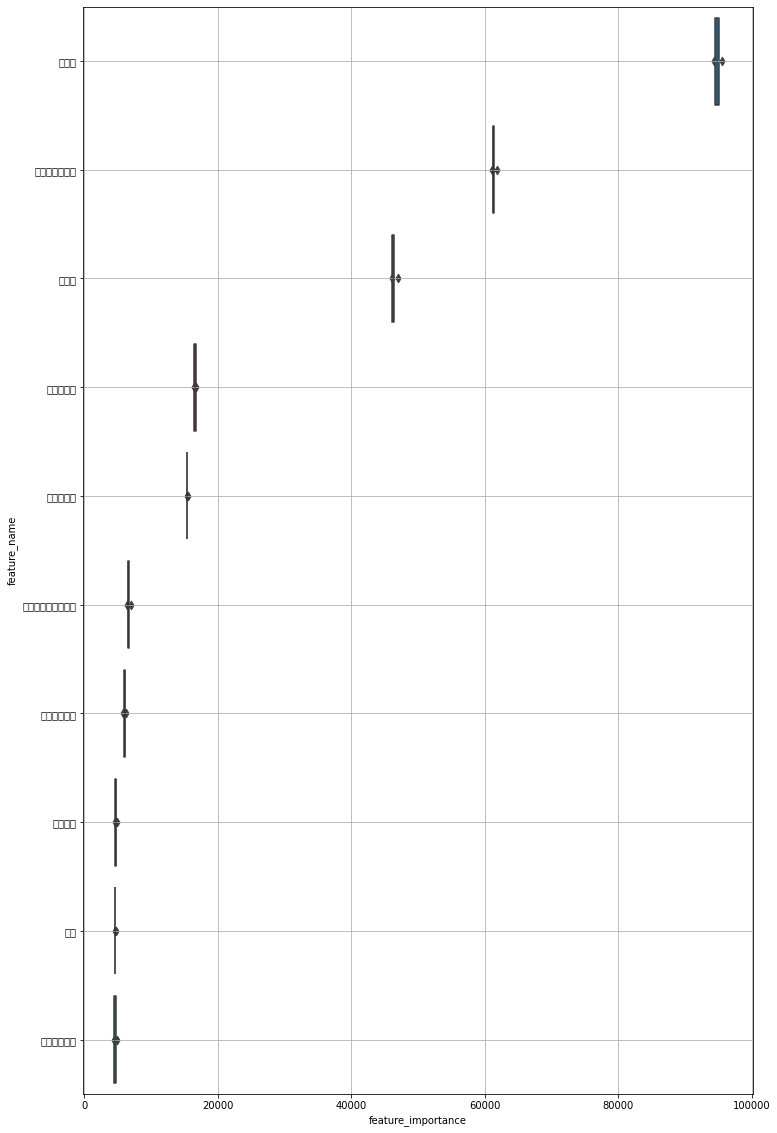

In [ ]:
model.visualize_importance()

In [ ]:
df_sub["取引価格（総額）_log"] = pred_test
df_sub

In [ ]:
df_sub.to_csv("/content/drive/MyDrive/Competitions/Nishika/mansion/submission/LightGBM_v1.csv", index=False)